<a href="https://colab.research.google.com/github/sagarsitap596/gcolab_python/blob/master/Visualize_Data_using_Matplotlib_Code_Along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Dataset Analysis

## Problem Statement
We want to know as to what happens during an IPL match which raises several questions in our mind with our limited knowledge about the game called cricket on which it is based. This analysis is done to know as which factors led one of the team to win and how does it matter.

## About the Dataset :
The Indian Premier League (IPL) is a professional T20 cricket league in India contested during April-May of every year by teams representing Indian cities. It is the most-attended cricket league in the world and ranks sixth among all the sports leagues. It has teams with players from around the world and is very competitive and entertaining with a lot of close matches between teams.

The IPL and other cricket related datasets are available at [cricsheet.org](https://cricsheet.org/%c2%a0(data). Feel free to visit the website and explore the data by yourself as exploring new sources of data is one of the interesting activities a data scientist gets to do.

## About the dataset:
Snapshot of the data you will be working on:<br>
<br>
The dataset 136522 data points and 23 features<br>

|Features|Description|
|-----|-----|
|match_code|Code pertaining to individual match|
|date|Date of the match played|
|city|City where the match was played|
|venue|Stadium in that city where the match was played|
|team1|team1|
|team2|team2|
|toss_winner|Who won the toss out of two teams|
|toss_decision|toss decision taken by toss winner|
|winner|Winner of that match between two teams|
|win_type|How did the team won(by wickets or runs etc.)|
|win_margin|difference with which the team won| 
|inning|inning type(1st or 2nd)|
|delivery|ball delivery|
|batting_team|current team on batting|
|batsman|current batsman on strike|
|non_striker|batsman on non-strike|
|bowler|Current bowler|
|runs|runs scored|
|extras|extra run scored|
|total|total run scored on that delivery including runs and extras|
|extras_type|extra run scored by wides or no ball or legby|
|player_out|player that got out|
|wicket_kind|How did the player got out|
|wicket_fielders|Fielder who caught out the player by catch|


### Analyzing data using matplotlib module

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

data_ipl = pd.read_csv('/content/ipl_dataset.csv')
data_ipl['year'] = data_ipl['date'].apply(lambda x : x[:4])
data_ipl.head()

,match_code,date,city,venue,team1,team2,toss_winner,toss_decision,winner,win_type,win_margin,inning,delivery,batting_team,batsman,non_striker,bowler,runs,extras,total,extras_type,player_out,wicket_kind,wicket_fielders,year
0,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.1,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
1,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.2,Mumbai Indians,ST Jayasuriya,SR Tendulkar,I Sharma,1,0,1,NaN,NaN,NaN,NaN,2009
2,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.3,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,1,1,wides,NaN,NaN,NaN,2009
3,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.4,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,0,0,0,NaN,NaN,NaN,NaN,2009
4,392203,2009-05-01,East London,Buffalo Park,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,9.0,1,0.5,Mumbai Indians,SR Tendulkar,ST Jayasuriya,I Sharma,2,0,2,NaN,NaN,NaN,NaN,2009


### Plot the number of matches played each season

Text(0.5, 1.0, 'Number of matches played each season')

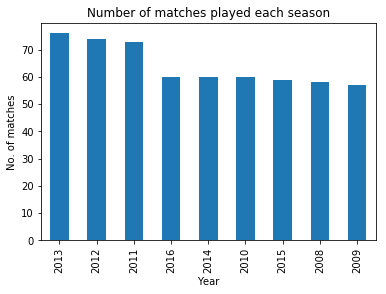

In [0]:
unique_matches = data_ipl.drop_duplicates(subset='match_code')
df = unique_matches.groupby('year').size().sort_values(ascending=False)
df.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No. of matches')
plt.title('Number of matches played each season')

### Plot the number of matches in each venue

Text(0.5, 1.0, 'Number of matches played')

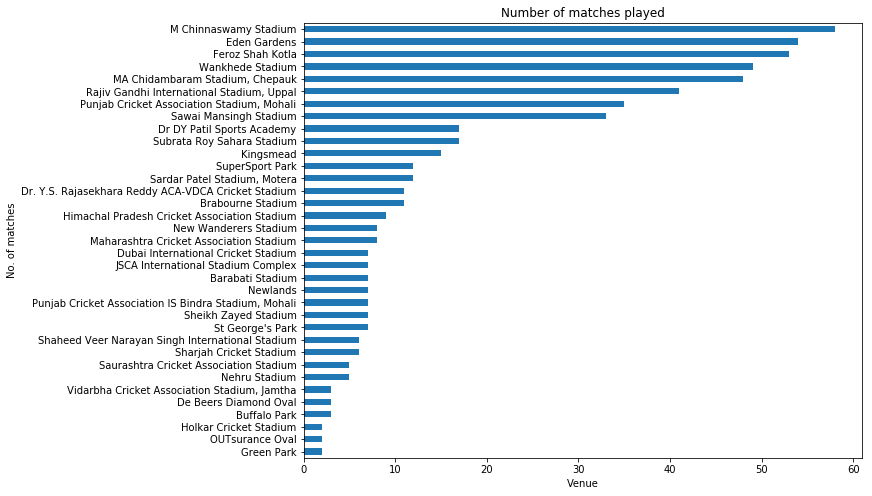

In [0]:
df = unique_matches.groupby('venue').size().sort_values(ascending=True)
df.plot(kind='barh',figsize=(10,8))
plt.xlabel('Venue')
plt.ylabel('No. of matches')
plt.title('Number of matches played')

### Plot the total no. of wins gained by teams across all seasons 

Text(0.5, 1.0, 'Wins gained by teams across all seasons')

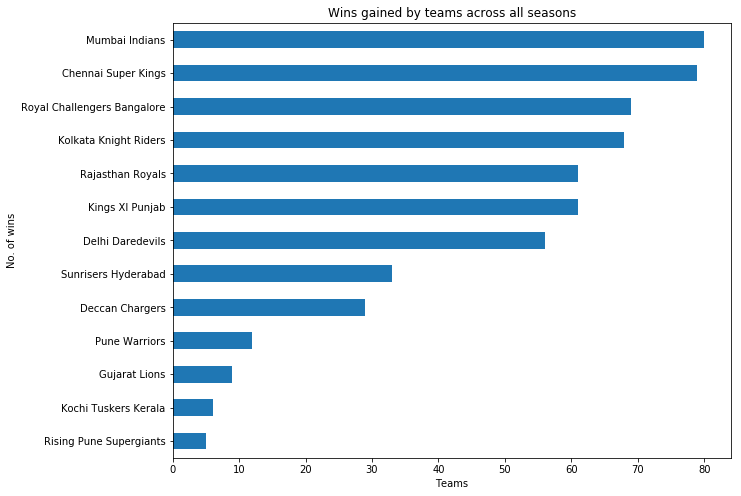

In [0]:
df = unique_matches.groupby('winner').size().sort_values(ascending=True)
df.plot(kind='barh',figsize=(10,8))
plt.xlabel('Teams')
plt.ylabel('No. of wins')
plt.title('Wins gained by teams across all seasons')

### What are the total number of matches played by each team across all seasons ?

Text(0.5, 1.0, 'total number of matches played by each team across all seasons')

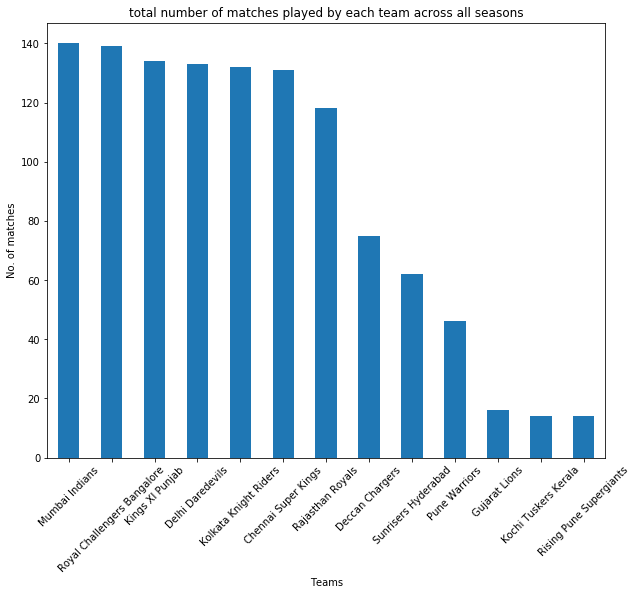

In [0]:
team1 = unique_matches['team1']
team2 = unique_matches['team2']

allteam_matches=pd.concat([team1,team2])
series1 = allteam_matches.value_counts().sort_values(ascending=False)
series1.plot(kind='bar',figsize=(10,8))
plt.xlabel('Teams')
plt.ylabel('No. of matches')
plt.xticks(rotation=45)
plt.title('total number of matches played by each team across all seasons')

### Bowlers with high ratings usually have a record of higher no. of wickets to their name. Implementing the same within our data we might get who qualifies to being an outstanding bowler across seasons.

Text(0.5, 1.0, 'Bowlers and their wickets stats')

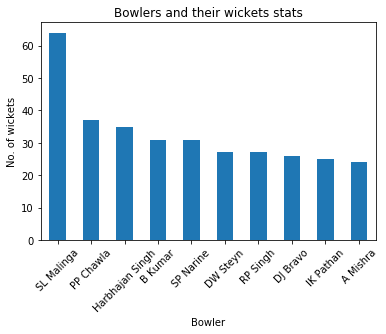

In [0]:
# Bowlers performance can be judged by categories such 'bowled' and 'caught and bowled'
# subset the dataframe according to above categories
wicktes_df = data_ipl[data_ipl['wicket_kind'].isin(['bowled','caught and bowled'])]
# bowlers_wickets_series = wicktes_df.groupby('bowler').size().sort_values(ascending=False).head(10)
bowlers_wickets_series = wicktes_df.groupby('bowler').size().nlargest(10)
bowlers_wickets_series.plot(kind='bar')

plt.xlabel('Bowler')
plt.ylabel('No. of wickets')
plt.xticks(rotation=45)
plt.title('Bowlers and their wickets stats')



### Certainly apart from team's consistency of performing well , we also have venues which plays an important part in scoring and defending. How did the different pitches behave? What was the average score for each stadium?

Text(0.5, 1.0, 'Avg score of each venue')

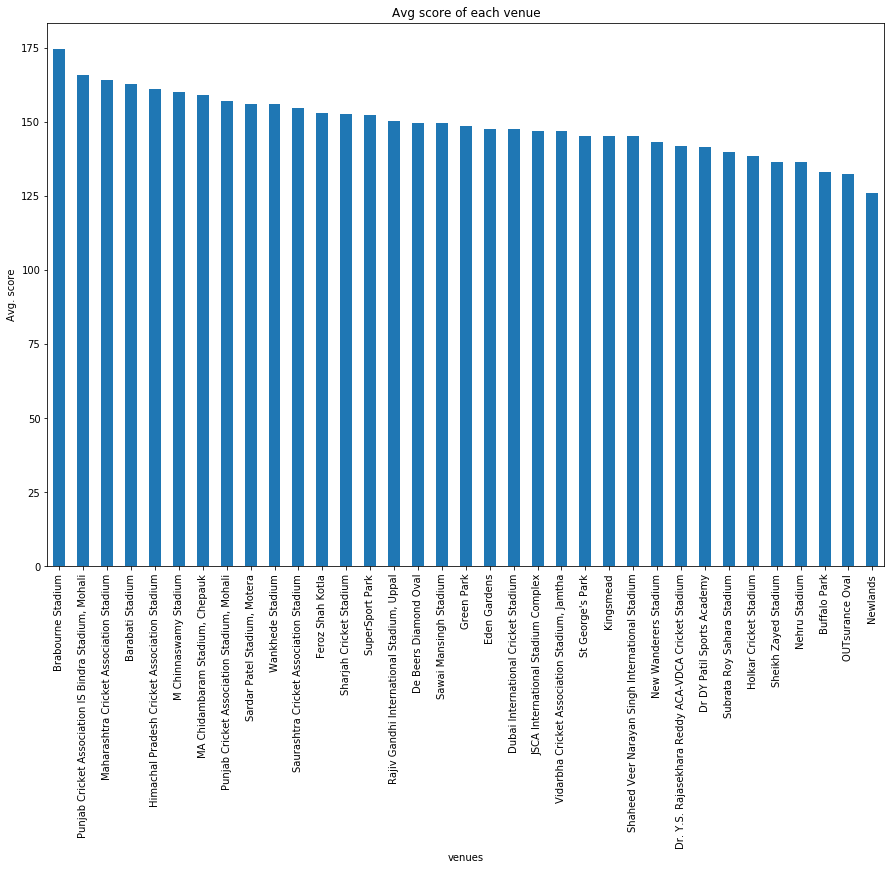

In [0]:
df = data_ipl.groupby(['match_code','batting_team','venue'])['total'].sum().reset_index()
df = df.groupby('venue')['total'].mean().sort_values(ascending=False)
df.plot(kind='bar',figsize=(15,10))
plt.xlabel('venues')
plt.ylabel('Avg. score')
# plt.xticks(rotation=45)
plt.title('Avg score of each venue')

### A dismissal occurs when the batsman is out (also known as the fielding side taking a wicket and/or the batting side losing a wicket). Let's look at our data and find out the types of Dismissal and how often they occur.

Text(0.5, 1.0, 'Types of Dismissal and how often they occur.')

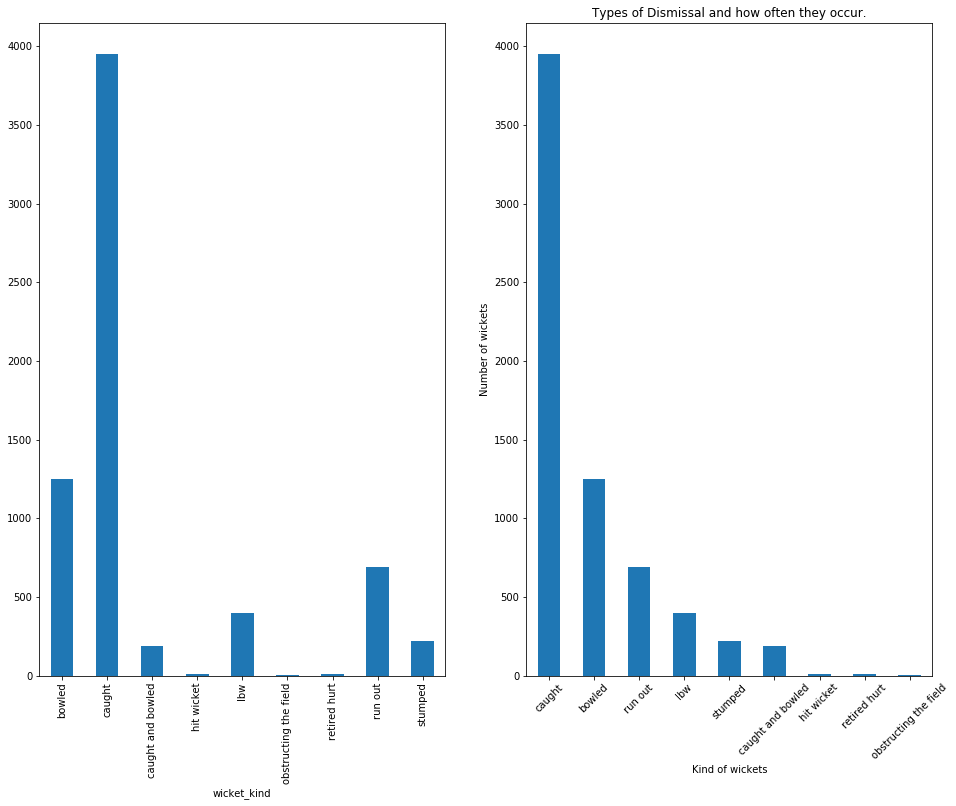

In [0]:
fig, (ax_1,ax_2) = plt.subplots(1,2,figsize=(16,12))

# two ways to do so
df1 = data_ipl.groupby('wicket_kind').size()
df2 = data_ipl['wicket_kind'].value_counts()


df1.plot(kind='bar',ax=ax_1)
df2.plot(kind='bar',ax=ax_2)

plt.xlabel('Kind of wickets')
plt.ylabel('Number of wickets')
plt.xticks(rotation=45)
plt.title('Types of Dismissal and how often they occur.')


### Plot no. of boundaries (which includes what are the sixes and fours scored) across IPL seasons

Text(0.5, 1.0, 'Boundaries stats')

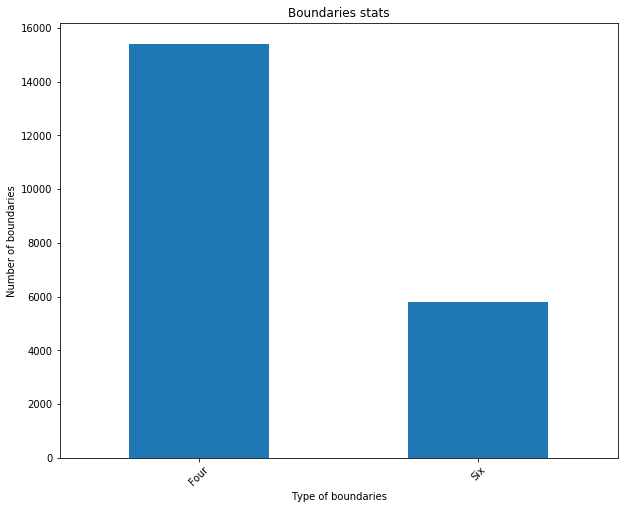

In [0]:
df = data_ipl[data_ipl['runs'].isin([4,6])].groupby('runs').size()

# renaming index 4 == Four and 6 = Six
df.index = list(map(lambda x : 'Four' if x == 4 else 'Six',df.index))
df.index

df.plot(kind='bar',figsize=(10,8))
plt.xlabel('Type of boundaries')
plt.ylabel('Number of boundaries')
plt.xticks(rotation=45)
plt.title('Boundaries stats')

In [0]:
data_ipl.groupby(['match_code','year']).size()

match_code  year
335982      2008    225
335983      2008    248
335984      2008    219
335985      2008    246
335986      2008    240
335987      2008    241
335988      2008    205
335989      2008    255
335990      2008    248
335991      2008    250
335992      2008    229
335993      2008    233
335994      2008    202
335995      2008    248
335996      2008    247
335997      2008    243
335998      2008    243
335999      2008    239
336000      2008    249
336001      2008    244
336002      2008    240
336003      2008    247
336004      2008    238
336005      2008    208
336006      2008    238
336007      2008    236
336008      2008    202
336009      2008    251
336010      2008    197
336011      2008    223
                   ... 
980961      2016    229
980963      2016    247
980965      2016    248
980967      2016    242
980969      2016    244
980971      2016    245
980973      2016    226
980975      2016    232
980977      2016    246
980979      2016    244

### Get the average statistics across seasons (such as average runs scored per match, average balls bowled per match by season and average runs scored against each ball bowled per season)

Text(0.5, 1.0, 'Average runs scored against each ball bowled per season')

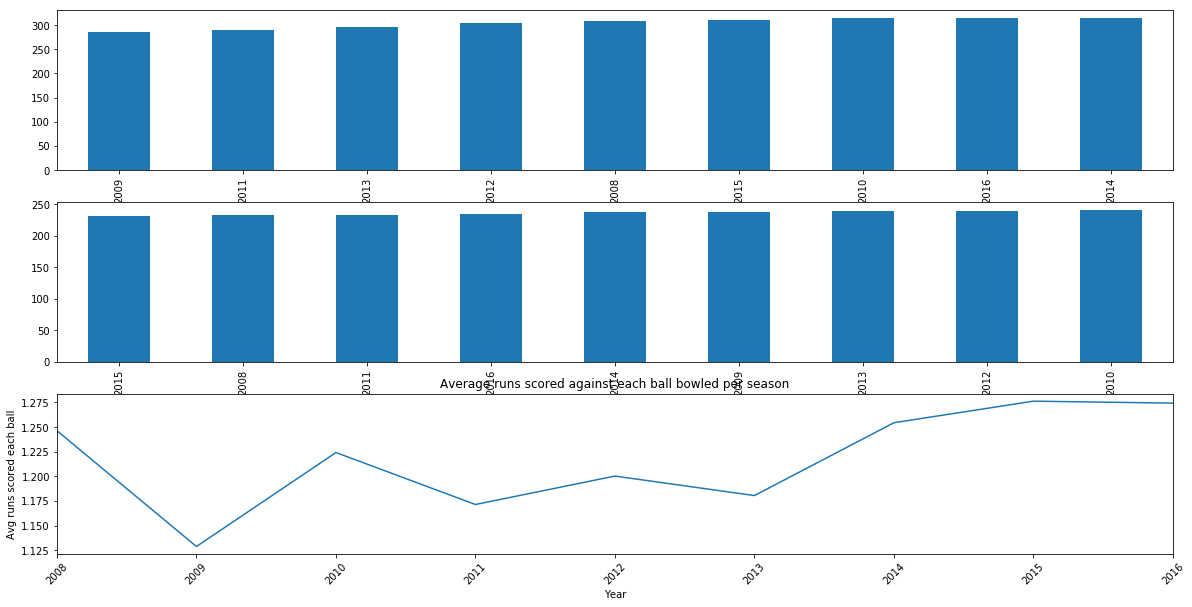

In [0]:
fig,(axes_1,axes_2,axes_3) = plt.subplots(3,1,figsize=(20,10))

#average runs scored per match by season

year_wise_match_total_score = data_ipl.groupby(['match_code','year'])['total'].sum().reset_index()
avg_score_permatch_per_year = year_wise_match_total_score.groupby('year')['total'].mean().sort_values()
avg_score_permatch_per_year.plot(kind='bar',ax=axes_1)
plt.xlabel('Year')
plt.ylabel('Avg run scored per match')
plt.xticks(rotation=45)
plt.title('Average runs scored per match by season')

#average balls bowled per match by season
year_wise_match_balls_bowled_df = data_ipl.groupby(['match_code','year']).size().reset_index()
year_wise_match_balls_bowled_df = year_wise_match_balls_bowled_df.rename(columns={0:'count'})

year_wise_avg_balls_bowled_per_match = year_wise_match_balls_bowled_df.groupby('year')['count'].mean().sort_values()

year_wise_avg_balls_bowled_per_match.plot(kind='bar',ax=axes_2)
plt.xlabel('Year')
plt.ylabel('Avg number of balls bowled')
plt.xticks(rotation=45)
plt.title('Average balls bowled per match by season')


#average runs scored against each ball bowled per season

year_wise_runs_per_ball = data_ipl.groupby('year')['runs'].mean()
year_wise_runs_per_ball.plot(kind='line',ax=axes_3)
plt.xlabel('Year')
plt.ylabel('Avg runs scored each ball')
plt.xticks(rotation=45)
plt.title('Average runs scored against each ball bowled per season')






### Team wins in home city vs other cities
Each team plays two matches against the other teams, one in its home city and other in the home city of the opposite team. It would be interesting see if playing in home city increases a teams chances of a win.

In [0]:
# to make easy to analysis data make names of team same across sessions
def standardize_team_name(city):
  if(city == 'Sunrisers Hyderabad' or city == 'Deccan Chargers'):
    return 'Sunrisers Hyderabad'
  elif(city == 'Pune Warriors' or city == 'Rising Pune Supergiants'):
    return 'Pune Warriors'
  else:
    return city
  
data_ipl['team1'] = data_ipl['team1'].apply(standardize_team_name)
data_ipl['team2'] = data_ipl['team2'].apply(standardize_team_name)


cities = data_ipl['city'].unique()
teams = pd.concat([data_ipl['team1'],data_ipl['team2']],ignore_index=True).unique()
print(cities,teams,sep='\n'+'==='*30+'\n')

# creat map of team and its home city
team_city_mapping = {
                  'Kolkata Knight Riders':'Kolkata',
                  'Rajasthan Royals':'Jaipur',
                  'Chennai Super Kings':'Chennai',
                  'Delhi Daredevils':'Delhi',
                  'Kings XI Punjab':'Chandigarh',
                  'Royal Challengers Bangalore':'Bangalore',
                  'Sunrisers Hyderabad':'Hyderabad',
                  'Mumbai Indians':'Mumbai',
                  'Gujarat Lions':'Ahmedabad',
                  'Pune Warriors':'Pune',
                  'Kochi Tuskers Kerala':'Visakhapatnam'
}

# making keys as values and vice versa
# team_city_map = dict(zip(list(team_city_map.values()),list(team_city_map.keys())))



['East London' 'Port Elizabeth' 'Centurion' 'neutral_venue' 'Chennai'
 'Jaipur' 'Kolkata' 'Delhi' 'Chandigarh' 'Hyderabad' 'Ranchi' 'Mumbai'
 'Bangalore' 'Dharamsala' 'Pune' 'Rajkot' 'Durban' 'Cuttack' 'Cape Town'
 'Ahmedabad' 'Johannesburg' 'Visakhapatnam' 'Abu Dhabi' 'Raipur' 'Kochi'
 'Kimberley' 'Nagpur' 'Bloemfontein' 'Indore' 'Kanpur']
['Kolkata Knight Riders' 'Sunrisers Hyderabad' 'Rajasthan Royals'
 'Chennai Super Kings' 'Delhi Daredevils' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Mumbai Indians' 'Gujarat Lions'
 'Pune Warriors' 'Kochi Tuskers Kerala']


In [0]:
unique_data = data_ipl.drop_duplicates(subset=('match_code'))

# Total matches played by each team throughout sessions
team_total_matches = pd.concat([unique_data['team1'],unique_data['team2']]).value_counts().reset_index()

# Renaming columns
team_total_matches.columns=['team','total_matches_played']

# get Teams and their win count throughout sessions
team_wins = unique_data.groupby('winner').size().to_dict()

# Add total_wins to team_total_matches data frame
# team_wins has keys team:count. So map function will map count in front of corresponding team in team column
team_total_matches['total_wins'] = team_total_matches['team'].map(team_wins)

# lets have just two columns
unique_data = unique_data[['winner','city']]

# function that returns 1 if win is in home city
def count_home_win(row):
  return 1 if team_city_mapping.get(row['winner']) == row['city'] else 0

# creates new colum that stores 1 for win in home city
unique_data['win_count'] = unique_data.apply(count_home_win,axis=1)


#gives each team's home win count
team_home_wins = unique_data.groupby('winner')['win_count'].sum().to_dict()

# create new columns that stores count of home win for each team
team_total_matches['total_home_wins'] = team_total_matches['team'].map(team_home_wins)

# create new columns that stores count of outside wins for each team
team_total_matches['total_outside_wins'] = team_total_matches['total_wins'] - team_total_matches['total_home_wins']

# create new columns that stores percent of home win
team_total_matches['home_win_percent'] = round(team_total_matches['total_home_wins'] / team_total_matches['total_wins'] * 100,2)

# create new columns that stores percent of outside win
team_total_matches['outside_win_percent'] = round(team_total_matches['total_outside_wins'] / team_total_matches['total_wins'] * 100,2)




<BarContainer object of 11 artists>

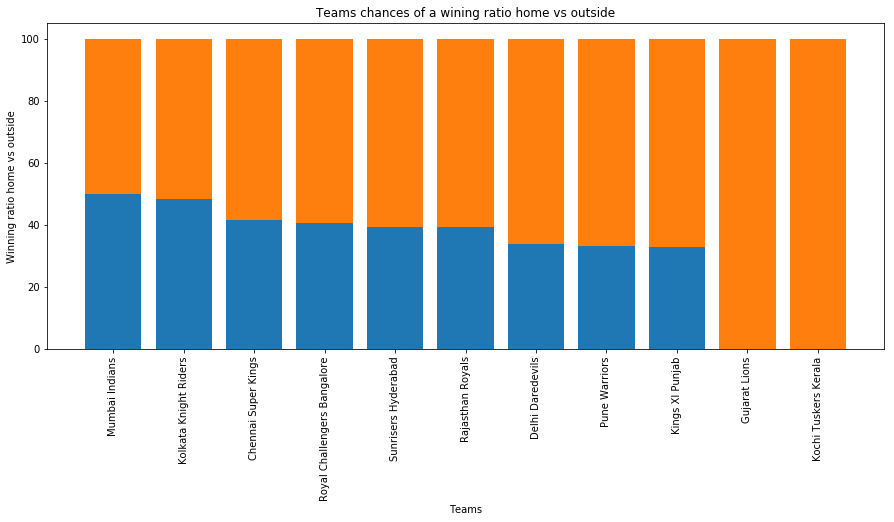

In [0]:
# one way using plt
team_total_matches.sort_values(by='home_win_percent',ascending=False,inplace=True)

plt.figure(figsize=[15,6])
plt.xlabel("Teams")
plt.ylabel("Winning ratio home vs outside")
plt.xticks(rotation=90)
plt.title("Teams chances of a wining ratio home vs outside")
plt.bar(team_total_matches['team'],team_total_matches['home_win_percent'])
plt.bar(team_total_matches['team'],team_total_matches['outside_win_percent'],bottom=team_total_matches['home_win_percent'])

Text(0.5, 1.0, 'Teams chances of a win home vs outside')

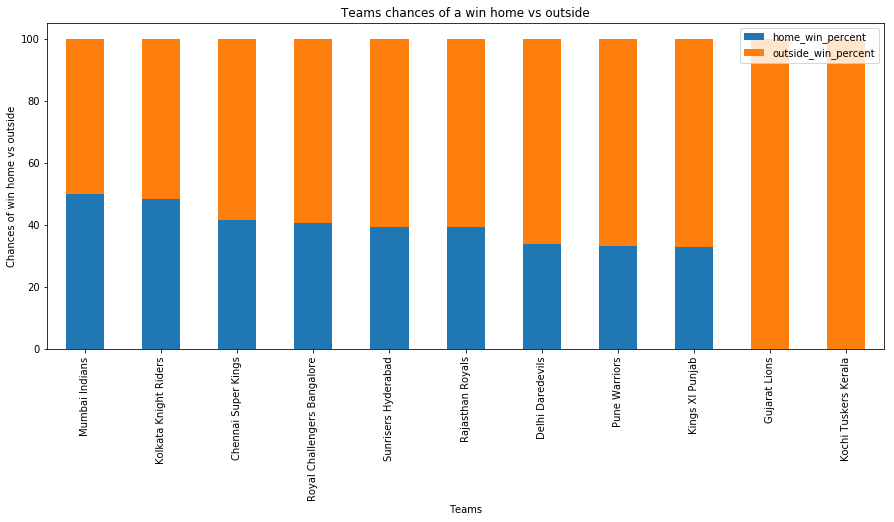

In [0]:
# second way using pands plot

team_total_matches.set_index('team',inplace=True)

team_total_matches.sort_values(by='home_win_percent',ascending=False,inplace=True)
team_total_matches[['home_win_percent','outside_win_percent']].plot(kind = 'bar',stacked=True,figsize=(15,6))

plt.ylabel("Chances of win home vs outside")
plt.xlabel("Teams")
plt.title("Teams chances of a win home vs outside")